In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/shreeram0511/Penguin-Prediction-App-POAI/main/penguins_size.csv")

In [ ]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
data.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

**Data Visualization**

In [ ]:
def bar_chart(feature):
    Adelie = data[data['species'] == 'Adelie'][feature].value_counts()
    Gentoo = data[data['species'] == 'Gentoo'][feature].value_counts()
    Chinstrap = data[data['species'] == 'Chinstrap'][feature].value_counts()
    
    df = pd.DataFrame([Adelie, Gentoo, Chinstrap])
    df.index = ['Adelie', 'Gentoo', 'Chinstrap']
    df.plot(kind = 'bar', stacked = True, figsize = (5,5))

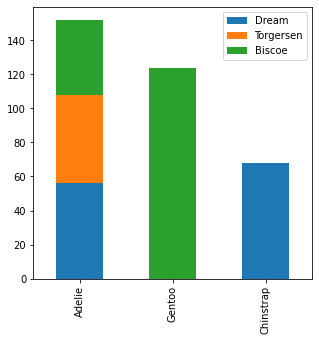

In [ ]:
bar_chart('island')

**Observation:**
- Gentoo is only from Biscoe island.
- Chinstrap is only from Dream island.
- Adelie is from all 3 islands(Dream, Torgersen, Biscoe).

**Data Cleansing**

In [ ]:
# No of null values in each feature
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

**Culmen Length**

Two data are missing. Let's fill them with median values grouped by island.

In [ ]:
data['culmen_length_mm'].fillna(data.groupby('island')['culmen_length_mm'].transform('median'), inplace = True)

**Culmen Depth**

Again two data are missing. Let's fill them with median values grouped by island.

In [ ]:
data['culmen_depth_mm'].fillna(data.groupby('island')['culmen_depth_mm'].transform('median'), inplace = True)

**Flipper Length**

In [ ]:
data['flipper_length_mm'].fillna(data.groupby('island')['flipper_length_mm'].transform('median'), inplace = True)

**Body Mass**

In [ ]:
data['body_mass_g'].fillna(data.groupby('island')['body_mass_g'].transform('median'), inplace = True)

**Gender**

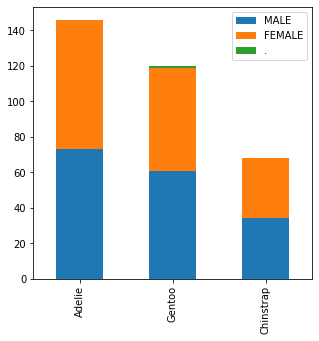

In [ ]:
bar_chart('sex')

In [ ]:
# Let's replace the above dot with Nan value
data['sex'] = data['sex'].replace('.', None)

**Observations:**
- There is a dot instead of Male or Female.
- (73x2) + (34x2) + (61+58+1) = 334, Actualy there are 11 data missing in '**sex**' column considering the above 'dot'.

**Assumptions:**
- 73x2 = 146 penguin gender of 'Adelie' species are specified. So, 152-146 = 6 data in 'sex' column are missing. Let's assume 3 of them are male and the others are female.
- Similarly, let's assume penguins of the Gentoo species has 62 male and female.
- ***I don't think gender has any role to identify a species.*** So I will just drop it

In [ ]:
data = data.drop('sex', axis = 1)

**Feature Engineering**

In [ ]:
dataset = [data]

**Island**

In [ ]:
data.island.value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [ ]:
# Biscoe: 0, Dream: 1, Torgersen: 2
island_mapping = {"Biscoe": 0, "Dream": 1, "Torgersen": 2}

for _data in dataset:
    _data['island'] = _data['island'].map(island_mapping)

In [ ]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,2,39.1,18.7,181.0,3750.0
1,Adelie,2,39.5,17.4,186.0,3800.0
2,Adelie,2,40.3,18.0,195.0,3250.0
3,Adelie,2,38.9,18.4,191.0,3700.0
4,Adelie,2,36.7,19.3,193.0,3450.0


In the following features data are scattered in different values(sizes). Let's catagorize them as:
- ***small*** = 0
- ***medium*** = 1
- ***large*** = 2

**Culmen Length**

In [ ]:
data['culmen_length_mm'].describe()

count    344.000000
mean      43.912791
std        5.451328
min       32.100000
25%       39.200000
50%       44.450000
75%       48.500000
max       59.600000
Name: culmen_length_mm, dtype: float64

In [ ]:
data['Categorical_culmen_length'] = pd.cut(data['culmen_length_mm'], 3)
print(data['Categorical_culmen_length'])

0      (32.072, 41.267]
1      (32.072, 41.267]
2      (32.072, 41.267]
3      (32.072, 41.267]
4      (32.072, 41.267]
             ...       
339    (41.267, 50.433]
340    (41.267, 50.433]
341    (41.267, 50.433]
342    (41.267, 50.433]
343    (41.267, 50.433]
Name: Categorical_culmen_length, Length: 344, dtype: category
Categories (3, interval[float64, right]): [(32.072, 41.267] < (41.267, 50.433] < (50.433, 59.6]]


In [ ]:
for _data in dataset:
    _data.loc[_data['culmen_length_mm']<=41.267, 'culmen_length_mm'] = 0
    _data.loc[(_data['culmen_length_mm'] > 41.267) & (data['culmen_length_mm'] <= 50.433), 'culmen_length_mm'] = 1
    _data.loc[_data['culmen_length_mm']>50.433, 'culmen_length_mm'] = 2

In [ ]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Categorical_culmen_length
0,Adelie,2,0.0,18.7,181.0,3750.0,"(32.072, 41.267]"
1,Adelie,2,0.0,17.4,186.0,3800.0,"(32.072, 41.267]"
2,Adelie,2,0.0,18.0,195.0,3250.0,"(32.072, 41.267]"
3,Adelie,2,0.0,18.4,191.0,3700.0,"(32.072, 41.267]"
4,Adelie,2,0.0,19.3,193.0,3450.0,"(32.072, 41.267]"


**Culmen Depth**

In [ ]:
data['culmen_depth_mm'].describe()

count    344.000000
mean      17.150000
std        1.972197
min       13.100000
25%       15.575000
50%       17.300000
75%       18.700000
max       21.500000
Name: culmen_depth_mm, dtype: float64

In [ ]:
data['Categorical_culmen_depth'] = pd.cut(data['culmen_depth_mm'], 3)
print(data['Categorical_culmen_depth'])

0        (15.9, 18.7]
1        (15.9, 18.7]
2        (15.9, 18.7]
3        (15.9, 18.7]
4        (18.7, 21.5]
            ...      
339    (13.092, 15.9]
340    (13.092, 15.9]
341    (13.092, 15.9]
342    (13.092, 15.9]
343      (15.9, 18.7]
Name: Categorical_culmen_depth, Length: 344, dtype: category
Categories (3, interval[float64, right]): [(13.092, 15.9] < (15.9, 18.7] < (18.7, 21.5]]


In [ ]:
for _data in dataset:
    _data.loc[_data['culmen_depth_mm']<=15.9, 'culmen_depth_mm'] = 0
    _data.loc[(_data['culmen_depth_mm'] > 15.9) & (data['culmen_depth_mm'] <= 18.7), 'culmen_depth_mm'] = 1
    _data.loc[_data['culmen_depth_mm']>18.7, 'culmen_depth_mm'] = 2

In [ ]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Categorical_culmen_length,Categorical_culmen_depth
0,Adelie,2,0.0,1.0,181.0,3750.0,"(32.072, 41.267]","(15.9, 18.7]"
1,Adelie,2,0.0,1.0,186.0,3800.0,"(32.072, 41.267]","(15.9, 18.7]"
2,Adelie,2,0.0,1.0,195.0,3250.0,"(32.072, 41.267]","(15.9, 18.7]"
3,Adelie,2,0.0,1.0,191.0,3700.0,"(32.072, 41.267]","(15.9, 18.7]"
4,Adelie,2,0.0,2.0,193.0,3450.0,"(32.072, 41.267]","(18.7, 21.5]"


**Flipper Length**

In [ ]:
data['flipper_length_mm'].describe()

count    344.000000
mean     200.924419
std       14.048649
min      172.000000
25%      190.000000
50%      197.000000
75%      213.250000
max      231.000000
Name: flipper_length_mm, dtype: float64

In [ ]:
data['Categorical_flipper_length'] = pd.cut(data['flipper_length_mm'], 3)
print(data['Categorical_flipper_length'])

0      (171.941, 191.667]
1      (171.941, 191.667]
2      (191.667, 211.333]
3      (171.941, 191.667]
4      (191.667, 211.333]
              ...        
339      (211.333, 231.0]
340      (211.333, 231.0]
341      (211.333, 231.0]
342      (211.333, 231.0]
343      (211.333, 231.0]
Name: Categorical_flipper_length, Length: 344, dtype: category
Categories (3, interval[float64, right]): [(171.941, 191.667] < (191.667, 211.333] < (211.333, 231.0]]


In [ ]:
for _data in dataset:
    _data.loc[_data['flipper_length_mm']<=191.667, 'flipper_length_mm'] = 0
    _data.loc[(_data['flipper_length_mm'] > 191.667) & (data['flipper_length_mm'] <= 211.333), 'flipper_length_mm'] = 1
    _data.loc[_data['flipper_length_mm']>211.333, 'flipper_length_mm'] = 2

In [ ]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Categorical_culmen_length,Categorical_culmen_depth,Categorical_flipper_length
0,Adelie,2,0.0,1.0,0.0,3750.0,"(32.072, 41.267]","(15.9, 18.7]","(171.941, 191.667]"
1,Adelie,2,0.0,1.0,0.0,3800.0,"(32.072, 41.267]","(15.9, 18.7]","(171.941, 191.667]"
2,Adelie,2,0.0,1.0,1.0,3250.0,"(32.072, 41.267]","(15.9, 18.7]","(191.667, 211.333]"
3,Adelie,2,0.0,1.0,0.0,3700.0,"(32.072, 41.267]","(15.9, 18.7]","(171.941, 191.667]"
4,Adelie,2,0.0,2.0,1.0,3450.0,"(32.072, 41.267]","(18.7, 21.5]","(191.667, 211.333]"


**Body Mass**

In [ ]:
data['body_mass_g'].describe()

count     344.000000
mean     4201.962209
std       800.670365
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4756.250000
max      6300.000000
Name: body_mass_g, dtype: float64

In [ ]:
data['Categorical_body_mass_g'] = pd.cut(data['body_mass_g'], 3)
print(data['Categorical_body_mass_g'])

0      (2696.4, 3900.0]
1      (2696.4, 3900.0]
2      (2696.4, 3900.0]
3      (2696.4, 3900.0]
4      (2696.4, 3900.0]
             ...       
339    (3900.0, 5100.0]
340    (3900.0, 5100.0]
341    (5100.0, 6300.0]
342    (5100.0, 6300.0]
343    (5100.0, 6300.0]
Name: Categorical_body_mass_g, Length: 344, dtype: category
Categories (3, interval[float64, right]): [(2696.4, 3900.0] < (3900.0, 5100.0] < (5100.0, 6300.0]]


In [ ]:
for _data in dataset:
    _data.loc[_data['body_mass_g']<=3900.0, 'body_mass_g'] = 0
    _data.loc[(_data['body_mass_g'] > 3900.0) & (data['body_mass_g'] <= 5100.0), 'body_mass_g'] = 1
    _data.loc[_data['body_mass_g']>5100.0, 'body_mass_g'] = 2

In [ ]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Categorical_culmen_length,Categorical_culmen_depth,Categorical_flipper_length,Categorical_body_mass_g
0,Adelie,2,0.0,1.0,0.0,0.0,"(32.072, 41.267]","(15.9, 18.7]","(171.941, 191.667]","(2696.4, 3900.0]"
1,Adelie,2,0.0,1.0,0.0,0.0,"(32.072, 41.267]","(15.9, 18.7]","(171.941, 191.667]","(2696.4, 3900.0]"
2,Adelie,2,0.0,1.0,1.0,0.0,"(32.072, 41.267]","(15.9, 18.7]","(191.667, 211.333]","(2696.4, 3900.0]"
3,Adelie,2,0.0,1.0,0.0,0.0,"(32.072, 41.267]","(15.9, 18.7]","(171.941, 191.667]","(2696.4, 3900.0]"
4,Adelie,2,0.0,2.0,1.0,0.0,"(32.072, 41.267]","(18.7, 21.5]","(191.667, 211.333]","(2696.4, 3900.0]"


**Droping unnecessary columns**

In [ ]:
features_drop = ['Categorical_culmen_length', 
                 'Categorical_culmen_depth', 
                 'Categorical_flipper_length',
                 'Categorical_body_mass_g']
data = data.drop(features_drop, axis = 1)

In [ ]:
train = data.drop('species', axis = 1)
target = data['species']
train.shape, target.shape

((344, 5), (344,))

**Classification**

In [ ]:
# We will be using K Fold Cross Validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=15, shuffle = True, random_state = 42)

**Decision Tree**

In [ ]:
# Decision Tree
clf = DecisionTreeClassifier()
score = cross_val_score(clf, train, target, cv = k_fold, n_jobs = 3, scoring = 'accuracy')
print(score)

[0.95652174 1.         1.         1.         1.         1.
 0.91304348 1.         0.95652174 1.         0.95652174 0.95652174
 0.91304348 1.         0.90909091]


In [ ]:
#decision tree score
print("Average accuracy: ", round(np.mean(score)*100, 2), '%')
print("Minimum accuracy: ", np.min(score)*100, '%')
print("Maximum accuracy: ", np.max(score)*100, '%')

Average accuracy:  97.08 %
Minimum accuracy:  90.9090909090909 %
Maximum accuracy:  100.0 %


**Random Forest**

In [ ]:
# Random Forest
clf = RandomForestClassifier()
score = cross_val_score(clf, train, target, cv = k_fold, n_jobs = 3, scoring = 'accuracy')
print(score)

[0.95652174 1.         1.         1.         1.         1.
 0.91304348 0.95652174 0.95652174 0.95652174 0.95652174 1.
 0.91304348 1.         0.90909091]


In [ ]:
# random forest score
print("Average accuracy: ", round(np.mean(score)*100, 2), '%')
print("Minimum accuracy: ", np.min(score)*100, '%')
print("Maximum accuracy: ", np.max(score)*100, '%')

Average accuracy:  96.79 %
Minimum accuracy:  90.9090909090909 %
Maximum accuracy:  100.0 %


**SVM**

In [ ]:
# SVM
clf = SVC()
score = cross_val_score(clf, train, target, cv = k_fold, n_jobs = 3, scoring = 'accuracy')
print(score)

[0.95652174 1.         0.95652174 1.         1.         1.
 0.91304348 0.95652174 0.95652174 0.95652174 0.91304348 1.
 0.91304348 1.         0.90909091]


In [ ]:
# svm score
print("Average accuracy: ", round(np.mean(score)*100, 2), '%')
print("Minimum accuracy: ", np.min(score)*100, '%')
print("Maximum accuracy: ", np.max(score)*100, '%')

Average accuracy:  96.21 %
Minimum accuracy:  90.9090909090909 %
Maximum accuracy:  100.0 %
